## Data Loading and Initial Cleaning

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
import io
from sklearn.cluster import KMeans

df = pd.read_csv('Datasets/spotify_songs.csv')
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [28]:
print(df.shape)

(32833, 23)


In [29]:
df.info

<bound method DataFrame.info of                      track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
2      1z1Hg7Vb0AhHDiEmnDE79l   
3      75FpbthrwQmzHlBJLuGdC7   
4      1e8PAfcKUYoKkxPhrHqw4x   
...                       ...   
32828  7bxnKAamR3snQ1VGLuVfC1   
32829  5Aevni09Em4575077nkWHz   
32830  7ImMqPP3Q1yfUHvsdn7wEo   
32831  2m69mhnfQ1Oq6lGtXuYhgX   
32832  29zWqhca3zt5NsckZqDf6c   

                                              track_name      track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                        Memories - Dillon Francis Remix          Maroon 5   
2                        All the Time - Don Diablo Remix      Zara Larsson   
3                      Call You Mine - Keanu Silva Remix  The Chainsmokers   
4                Someone You Loved - Future Humans Remix     Lewis Capaldi   
...                                                  ...               ...   
32828               City 

In [30]:
print("\nColumns:")
print(df.columns)


Columns:
Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')


In [31]:
df_cleaned = df.dropna()
df_cleaned

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [32]:
df_cleaned.isnull().values.any()

False

In [33]:
df_cleaned.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000
mean,42.483551,0.654850,0.698603,5.373949,-6.719529,0.565737,0.107053,0.175352,0.084760,0.190175,0.510556,120.883642,225796.829779
std,24.980476,0.145092,0.180916,3.611572,2.988641,0.495667,0.101307,0.219644,0.224245,0.154313,0.233152,26.903632,59836.492346
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171250,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.961000,187804.500000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918250,253581.250000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [34]:
invalid_loudness = df_cleaned[(df_cleaned['loudness'] < -60) | (df_cleaned['loudness'] > 0)]
print(f"Found {len(invalid_loudness)} rows that have invalid loudness value.")

df_cleaned_new = df_cleaned[(df_cleaned['loudness'] >=-60 ) & (df_cleaned['loudness'] <= 0)]

Found 6 rows that have invalid loudness value.


In [35]:
df_cleaned_new.isnull().sum().sort_values(ascending=False)

track_id                    0
energy                      0
tempo                       0
valence                     0
liveness                    0
instrumentalness            0
acousticness                0
speechiness                 0
mode                        0
loudness                    0
key                         0
danceability                0
track_name                  0
playlist_subgenre           0
playlist_genre              0
playlist_id                 0
playlist_name               0
track_album_release_date    0
track_album_name            0
track_album_id              0
track_popularity            0
track_artist                0
duration_ms                 0
dtype: int64

In [36]:
df_cleaned_new.duplicated().any()

False

In [37]:
df_cleaned_new['track_id'].duplicated().any()

True

In [38]:
df_cleaned_new[df_cleaned_new['track_id'].duplicated(keep=False)]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.613,124.008,176616
5,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,8,-5.385,1,0.1270,0.079900,0.000000,0.1430,0.585,124.982,163049
7,6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,4,-2.419,0,0.0434,0.033500,0.000005,0.1110,0.367,127.936,207619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32783,1mzGywacjpeik00PVLBPpF,All of Me (Tiësto's Birthday Treatment Remix) ...,John Legend,64,4c2rSdHI9WUXn0zyXoWtbB,All of Me (Tiësto's Birthday Treatment Remix) ...,2014-02-25,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-6.253,0,0.0283,0.000151,0.001650,0.0745,0.179,127.986,251613
32793,1nas007nDbzLwDGwvMdz79,How You Love Me,3LAU,52,0IsgaoqRfJAJ6wojxWDZ7C,How You Love Me,2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,1,-3.648,1,0.0839,0.183000,0.000000,0.3400,0.286,127.961,210469
32798,65hRZOQkVjmBdusz1N7aOv,Save The World,Swedish House Mafia,67,728voOLBbJUBgK2vooghcS,Save The World,2011-05-13,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-7.598,1,0.0474,0.014400,0.000000,0.0759,0.400,126.879,213338
32804,2KlZexJjJPuNWcN5uAG1GU,Gold (feat. Yuna),Adventure Club,1,2DVyzKYzqlQo4uTJLVtvBt,Calling All Heroes - EP,2013-10-22,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,9,-4.893,0,0.0413,0.031900,0.005360,0.1280,0.189,145.022,257045


In [39]:
repeated_rows = df_cleaned_new['track_id'].duplicated().sum()
repeated_ids = df_cleaned_new['track_id'].value_counts().loc[lambda x: x > 1].count()

print(f"Number of duplicate track_id rows: {repeated_rows}")
print(f"Number of unique track_id values that appear more than once: {repeated_ids}")

Number of duplicate track_id rows: 4476
Number of unique track_id values that appear more than once: 3165


In [40]:
df_cleaned_new = df_cleaned_new.drop_duplicates(subset='track_id', keep='first')

## Mood Label Assignment

In [41]:
mood_map = pd.DataFrame({
    "Valence 0.66–1 ": ["Ecstatic ", "Cheerful", "Calm "],
    "Valence 0.33–0.66 ": ["Determined (Kararlı)", "Neutral (Dengeli)", "Bored (İlgisiz/Rutin)"],
    "Valence 0–0.33 (Üzgün)": ["Aggressive (Öfkeli)", "Melancholic (Hüzünlü)", "Sad (Durgun)"]
}, index=["Energy 0.66–1", "Energy 0.33–0.66", "Energy 0–0.33"])

mood_map

,Valence 0.66–1,Valence 0.33–0.66,Valence 0–0.33 (Üzgün)
Energy 0.66–1,Ecstatic,Determined (Kararlı),Aggressive (Öfkeli)
Energy 0.33–0.66,Cheerful,Neutral (Dengeli),Melancholic (Hüzünlü)
Energy 0–0.33,Calm,Bored (İlgisiz/Rutin),Sad (Durgun)


In [42]:
def assign_mood(row):
    val = row['valence']
    eng = row['energy']

    if val > 0.66:
        if eng > 0.66:
            return "Ecstatic"
        elif eng > 0.33:
            return "Cheerful"
        else:
            return "Calm"
    elif val > 0.33:
        if eng > 0.66:
            return "Determined"
        elif eng > 0.33:
            return "Neutral"
        else:
            return "Bored"
    else:
        if eng > 0.66:
            return "Aggressive"
        elif eng > 0.33:
            return "Melancholic"
        else:
            return "Sad"

df_cleaned_new['mood'] = df_cleaned_new.apply(assign_mood, axis=1)

print(df_cleaned_new[['track_name', 'energy', 'valence', 'mood']])

                                              track_name  energy  valence  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...   0.916   0.5180   
1                        Memories - Dillon Francis Remix   0.815   0.6930   
2                        All the Time - Don Diablo Remix   0.931   0.6130   
3                      Call You Mine - Keanu Silva Remix   0.930   0.2770   
4                Someone You Loved - Future Humans Remix   0.833   0.7250   
...                                                  ...     ...      ...   
32828               City Of Lights - Official Radio Edit   0.922   0.2100   
32829                Closer - Sultan & Ned Shepard Remix   0.786   0.4000   
32830                       Sweet Surrender - Radio Edit   0.821   0.4360   
32831                     Only For You - Maor Levi Remix   0.888   0.3080   
32832                             Typhoon - Original Mix   0.884   0.0894   

             mood  
0      Determined  
1        Ecstatic  
2      Determin

## Graphs

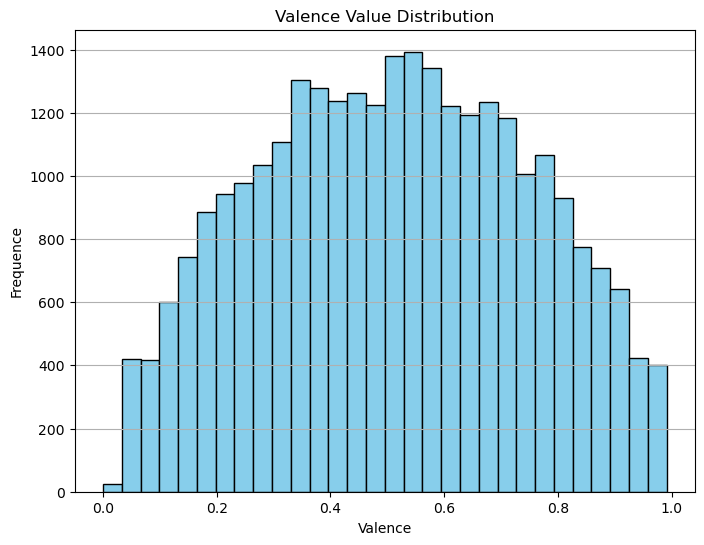

In [43]:
valence_data = df_cleaned_new['valence'].dropna()

plt.figure(figsize=(8, 6))
plt.hist(valence_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Valence Value Distribution')
plt.xlabel('Valence')
plt.ylabel('Frequence')
plt.grid(axis='y')
plt.show()

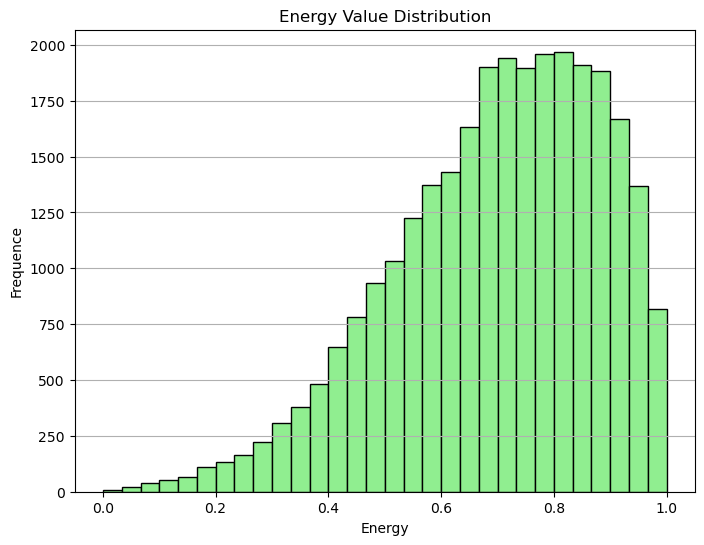

In [44]:
energy_data = df_cleaned_new['energy'].dropna()

plt.figure(figsize=(8, 6))
plt.hist(energy_data, bins=30, color='lightgreen', edgecolor='black')
plt.title('Energy Value Distribution')
plt.xlabel('Energy')
plt.ylabel('Frequence')
plt.grid(axis='y')
plt.show()

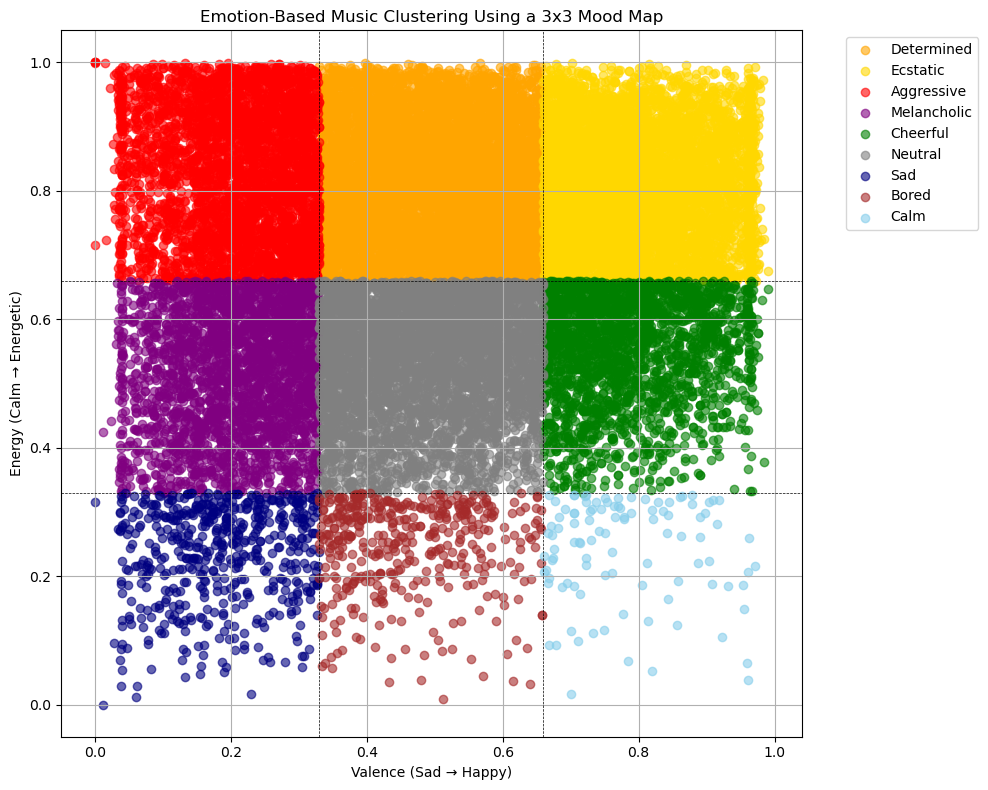

In [45]:
df_cleaned_new = df_cleaned_new.dropna(subset=['energy', 'valence'])

kmeans = KMeans(n_clusters=4, random_state=42)
df_cleaned_new['cluster'] = kmeans.fit_predict(df_cleaned_new[['valence', 'energy']])

def get_mood_label(valence, energy):
    if energy >= 0.66:
        if valence >= 0.66:
            return 'Ecstatic'
        elif valence >= 0.33:
            return 'Determined'
        else:
            return 'Aggressive'
    elif energy >= 0.33:
        if valence >= 0.66:
            return 'Cheerful'
        elif valence >= 0.33:
            return 'Neutral'
        else:
            return 'Melancholic'
    else:
        if valence >= 0.66:
            return 'Calm'
        elif valence >= 0.33:
            return 'Bored'
        else:
            return 'Sad'

df_cleaned_new['mood'] = df_cleaned_new.apply(
    lambda row: get_mood_label(row['valence'], row['energy']), axis=1
)

mood_colors = {
    'Ecstatic': 'gold',
    'Determined': 'orange',
    'Aggressive': 'red',
    'Cheerful': 'green',
    'Neutral': 'gray',
    'Melancholic': 'purple',
    'Calm': 'skyblue',
    'Bored': 'brown',
    'Sad': 'navy'
}

plt.figure(figsize=(10, 8))
for mood_label in df_cleaned_new['mood'].unique():
    clustered = df_cleaned_new[df_cleaned_new['mood'] == mood_label]
    plt.scatter(clustered['valence'], clustered['energy'],
                label=mood_label,
                alpha=0.6,
                c=mood_colors[mood_label])

plt.axhline(0.66, color='black', linewidth=0.5, linestyle='--')
plt.axhline(0.33, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0.66, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0.33, color='black', linewidth=0.5, linestyle='--')

plt.xlabel('Valence (Sad → Happy)')
plt.ylabel('Energy (Calm → Energetic)')
plt.title('Emotion-Based Music Clustering Using a 3x3 Mood Map')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

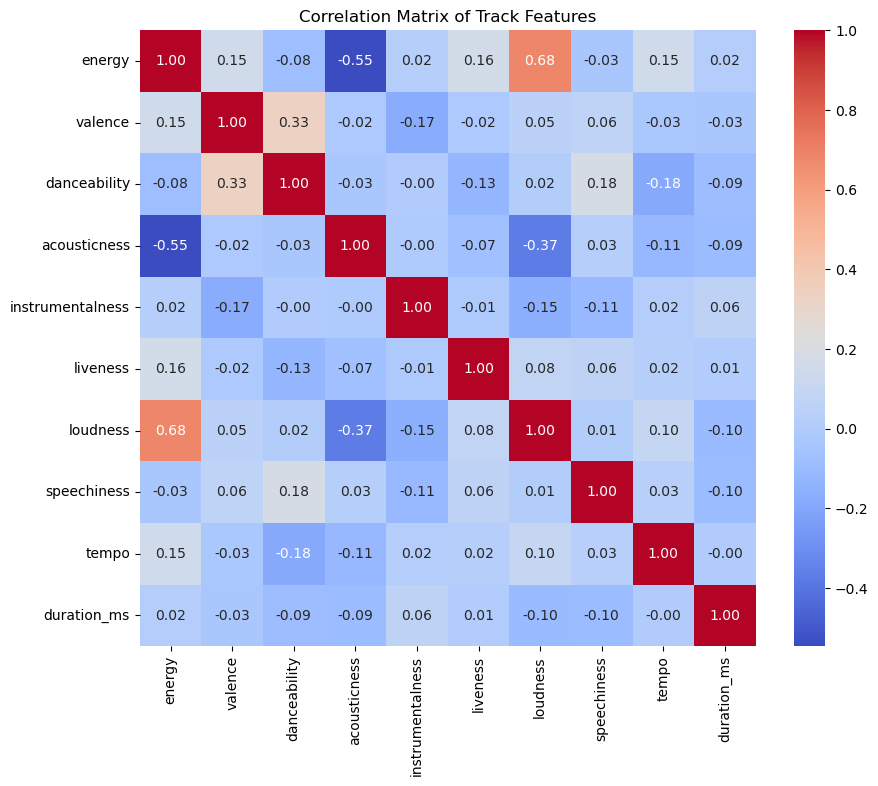

In [46]:
features = ['energy', 'valence', 'danceability', 'acousticness', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'duration_ms']

track_data = df_cleaned_new[features].dropna()

corr_matrix = track_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Track Features')
plt.show()

In [47]:
features = [
    'valence', 'energy', 'danceability', 'tempo', 'loudness',
    'acousticness', 'instrumentalness', 'liveness', 'speechiness'
]

data = df_cleaned_new[features].dropna()

corr_matrix = data.corr().abs()

mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
upper_tri = corr_matrix.where(mask)

high_corr_pairs = (
    upper_tri.stack()
    .sort_values(ascending=False)
    .reset_index()
)
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

print("Feature Pairs with the Highest Correlation:\n")
print(high_corr_pairs.head(10))

Feature Pairs with the Highest Correlation:

      Feature 1         Feature 2  Correlation
0        energy          loudness     0.682068
1        energy      acousticness     0.545914
2      loudness      acousticness     0.371701
3       valence      danceability     0.333853
4  danceability             tempo     0.184695
5  danceability       speechiness     0.183696
6       valence  instrumentalness     0.174227
7        energy          liveness     0.163766
8      loudness  instrumentalness     0.154239
9        energy             tempo     0.151535


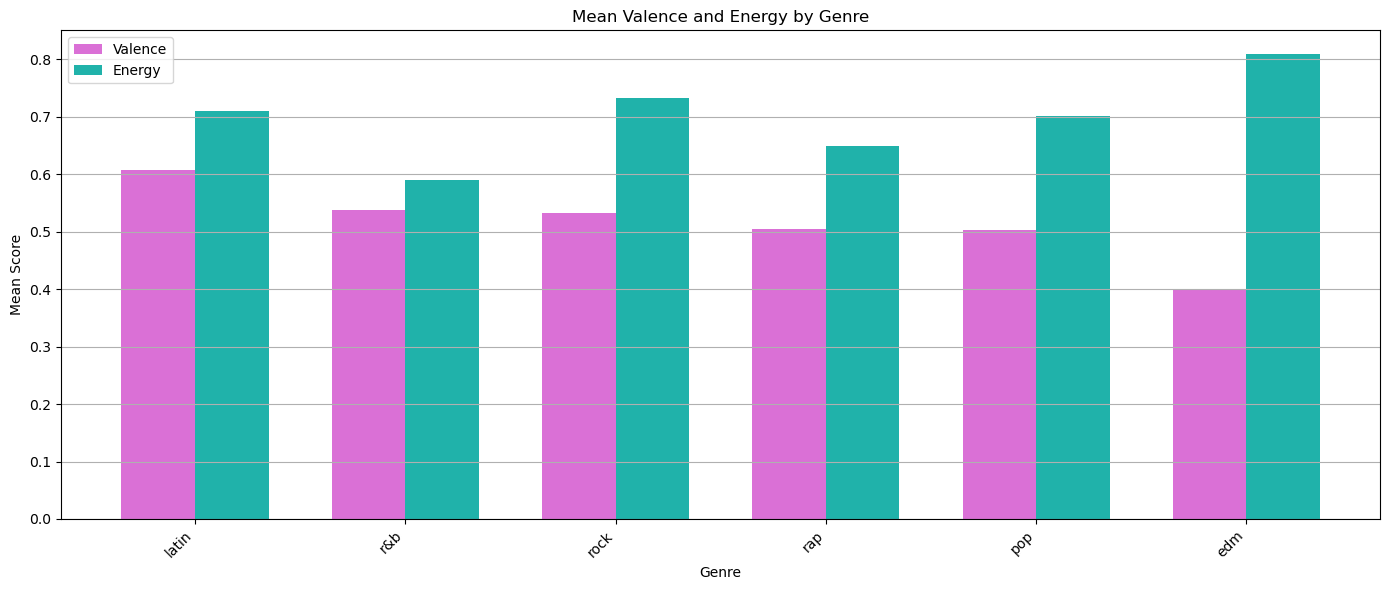

In [48]:
genre_column = 'playlist_genre' if 'playlist_genre' in df_cleaned_new.columns else 'genre'

mean_valence = df_cleaned_new.groupby(genre_column)['valence'].mean()
mean_energy = df_cleaned_new.groupby(genre_column)['energy'].mean()

mean_df = pd.DataFrame({
    'Mean Valence': mean_valence,
    'Mean Energy': mean_energy
}).sort_values('Mean Valence', ascending=False)

x = np.arange(len(mean_df))
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, mean_df['Mean Valence'], width=width, label='Valence', color='orchid')
plt.bar(x + width/2, mean_df['Mean Energy'], width=width, label='Energy', color='lightseagreen')

plt.title('Mean Valence and Energy by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Score')
plt.xticks(ticks=x, labels=mean_df.index, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

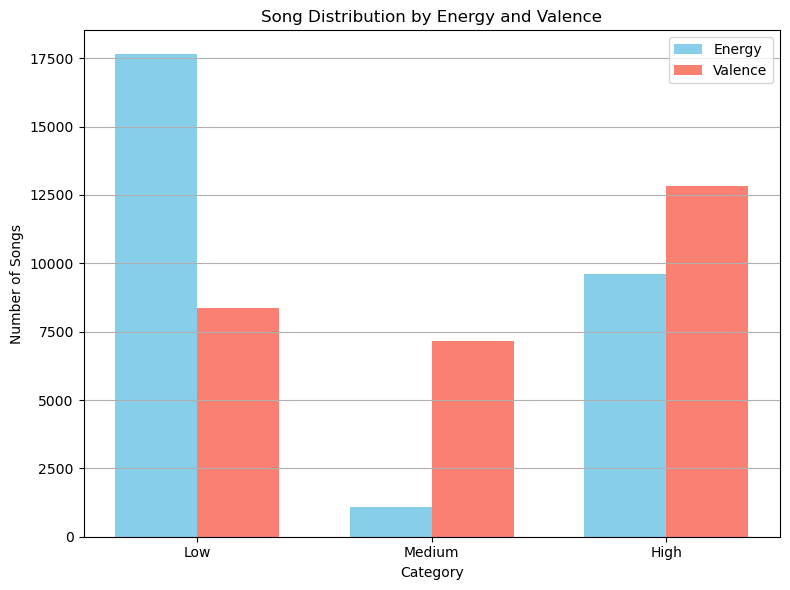

In [49]:
def energy_bin(value):
    if value <= 0.33:
        return 'Low Energy'
    elif value <= 0.66:
        return 'Medium Energy'
    else:
        return 'High Energy'

def valence_bin(value):
    if value <= 0.33:
        return 'Low Valence'
    elif value <= 0.66:
        return 'Medium Valence'
    else:
        return 'High Valence'

df_cleaned_new['Energy Category'] = df_cleaned_new['energy'].apply(energy_bin)
df_cleaned_new['Valence Category'] = df_cleaned_new['valence'].apply(valence_bin)

energy_counts = df_cleaned_new['Energy Category'].value_counts().sort_index()
valence_counts = df_cleaned_new['Valence Category'].value_counts().sort_index()

categories = ['Low', 'Medium', 'High']
x = np.arange(len(categories))
width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, energy_counts.values, width=width, label='Energy', color='skyblue')
plt.bar(x + width/2, valence_counts.values, width=width, label='Valence', color='salmon')

plt.title('Song Distribution by Energy and Valence')
plt.xlabel('Category')
plt.ylabel('Number of Songs')
plt.xticks(ticks=x, labels=categories)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

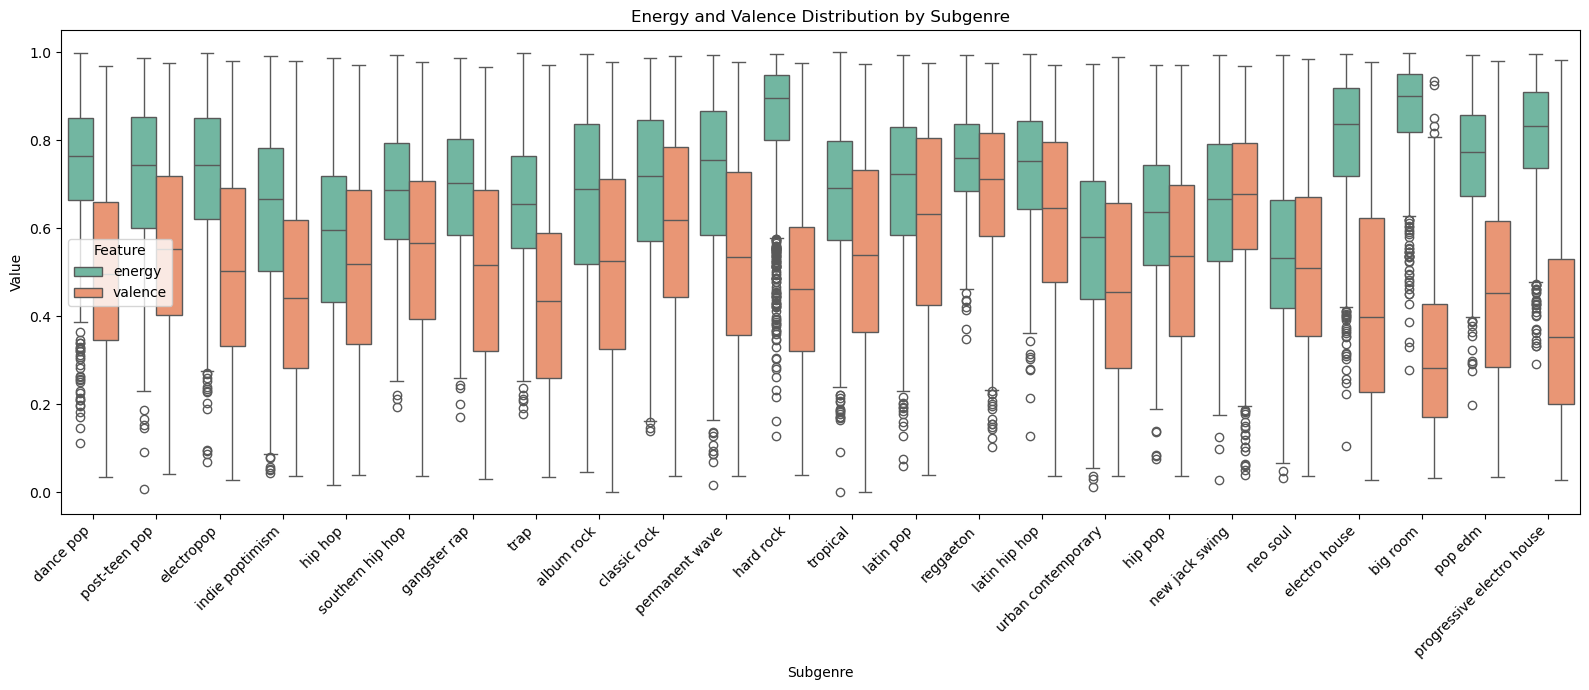

In [50]:
df_subset = df_cleaned_new[['playlist_subgenre', 'energy', 'valence']].dropna()

df_melted = pd.melt(df_subset, id_vars='playlist_subgenre', value_vars=['energy', 'valence'],
                    var_name='Feature', value_name='Value')

plt.figure(figsize=(16, 7))
sns.boxplot(x='playlist_subgenre', y='Value', hue='Feature', data=df_melted, palette='Set2')

plt.xticks(rotation=45, ha='right')
plt.title('Energy and Valence Distribution by Subgenre')
plt.xlabel('Subgenre')
plt.ylabel('Value')
plt.legend(title='Feature')
plt.tight_layout()
plt.show()


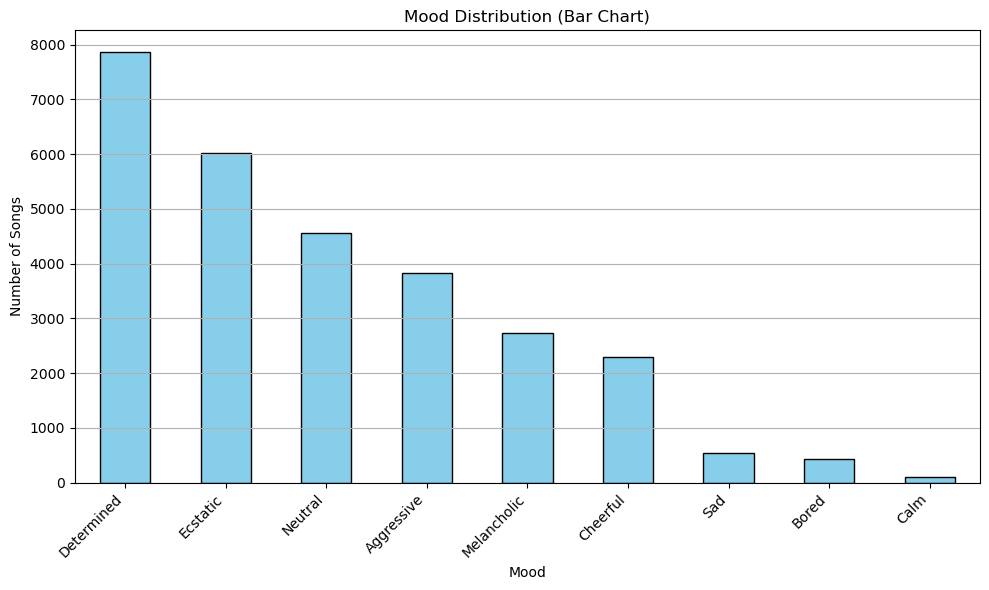

In [51]:
mood_counts = df_cleaned_new['mood'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
mood_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mood Distribution (Bar Chart)')
plt.xlabel('Mood')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Hot Encoding

In [52]:
df_encoded = pd.get_dummies(df_cleaned_new, columns=['playlist_subgenre'])

print(df_encoded.columns)
df_encoded

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'mood', 'cluster', 'Energy Category', 'Valence Category',
       'playlist_subgenre_album rock', 'playlist_subgenre_big room',
       'playlist_subgenre_classic rock', 'playlist_subgenre_dance pop',
       'playlist_subgenre_electro house', 'playlist_subgenre_electropop',
       'playlist_subgenre_gangster rap', 'playlist_subgenre_hard rock',
       'playlist_subgenre_hip hop', 'playlist_subgenre_hip pop',
       'playlist_subgenre_indie poptimism', 'playlist_subgenre_latin hip hop',
       'playlist_subgenre_latin pop', 'playlist_subgenre_neo soul',
       'playlist_subgenre_new jack swing', 'playlist_subgenre_permanent 

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,False,False,False,False,False,False,False,False,False,False
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,False,False,False,False,False,False,False,False,False,False
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,False,False,False,False,False,False,False,False,False,False
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,False,False,False,False,False,False,False,False,False,False
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,False,False,False,False,True,False,False,False,False,False
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,False,False,False,False,True,False,False,False,False,False
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,False,False,False,False,True,False,False,False,False,False
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,False,False,False,False,True,False,False,False,False,False
